## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [17]:
import util
import matplotlib
import random
import math
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [11]:
def recursive_fib(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return recursive_fib(n-1) + recursive_fib(n-2)

Проверьте, что функция работает корректно:

In [13]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [59]:
def recursive_fib_with_cache(n, cache={1: 1, 2: 1}):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        result = cache.get(n)
        if result is None:
            result = recursive_fib_with_cache(n-2, cache) + recursive_fib_with_cache(n-1, cache)
            cache[n] = result
    return result

Убедитесь, что функция работает корректно:

In [63]:
assert recursive_fib_with_cache(0) == 0
assert recursive_fib_with_cache(1) == 1
assert recursive_fib_with_cache(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [85]:
def fib(n):
    if n==0:
        res = 0
    elif n==1:
        res = 1
    else:
        res_prev = 0
        res = 1
        for i in range(n-1):
            res_prev, res = res, res_prev+res
    return res 

Проверьте правильность реализации:

In [86]:
assert fib(0) == 0
assert fib(1) == 1
assert fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

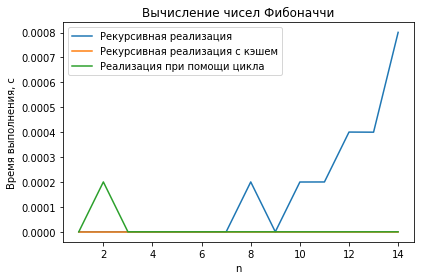

In [115]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [173]:
def bubble_sort(a):
    for i in range(len(a)-1):
        for j in range(len(a)-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]

Убедитесь, что сортировка написана верно:

In [174]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [177]:
def bubble_sort_adaptive(a):
    for i in range(len(a)-1):
        repl = False
        for j in range(len(a)-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                repl = True
        if not repl:
            break

Проверьте свою реализацию:

In [178]:
a = [5, 4, 3, 2, 1]
bubble_sort_adaptive(a)
assert util.is_sorted(a)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

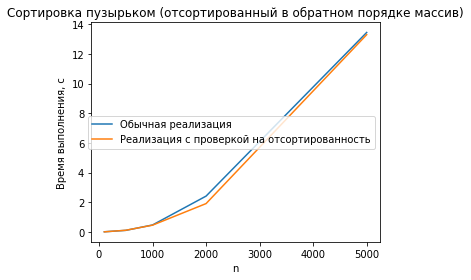

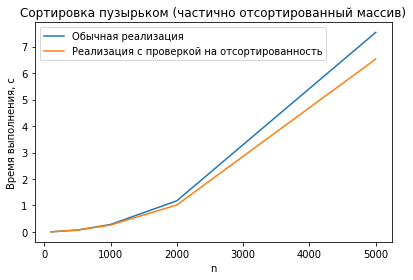

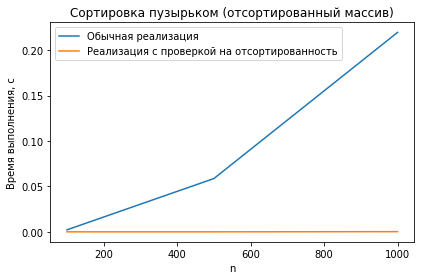

In [179]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [317]:
def quick_sort_first(a):
    l = 0
    r = len(a)-1
    pivot = a[1]
    while l<=r:
        while (a[l]<pivot):
            l+=1
        while (a[r]>pivot):
            r-=1
        if (l<=r):
            a[l],a[r] = a[r],a[l]
            l+=1
            r-=1

Проверьте свою реализацию:

In [319]:
a = [5, 4, 3, 2, 1]
quick_sort_first(a)
assert util.is_sorted(a)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [238]:
def quick_sort_middle(a):
    l = 0
    r = len(a)-1
    pivot = a[r//2]
    while l<=r:
        while (a[l]<pivot):
            l+=1
        while (a[r]>pivot):
            r-=1
        if (l<=r):
            a[l],a[r] = a[r],a[l]
            l+=1
            r-=1

Проверяем реализацию:

In [240]:
a = [5, 4, 3, 2, 1]
quick_sort_middle(a)
assert util.is_sorted(a)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [263]:
def quick_sort_random(a):
    l = 0
    r = len(a)-1
    pivot = random.choice(a)
    while l<=r:
        while (a[l]<pivot):
            l+=1
        while (a[r]>pivot):
            r-=1
        if (l<=r):
            a[l],a[r] = a[r],a[l]
            l+=1
            r-=1

Проверяем реализацию:

In [264]:
a = [5, 4, 3, 2, 1]
quick_sort_random(a)
assert util.is_sorted(a)

Сравним скорости работы трёх реализаций на различных входных данных:

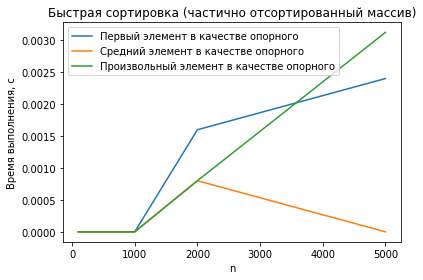

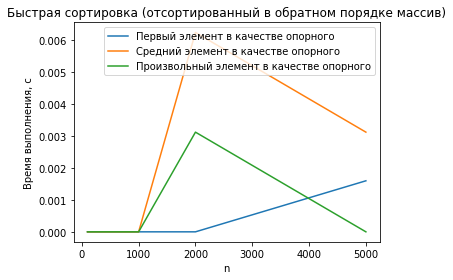

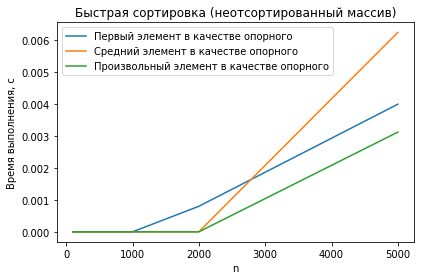

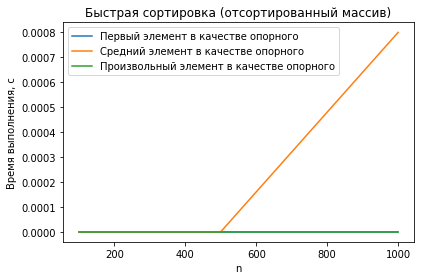

In [327]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [347]:
def merge(a, b):
    result = []
    i ,j = 0, 0
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            result.append(a[i])
            i += 1
        else:
            result.append(b[j])
            j += 1
    result += a[i:]
    result += b[j:]
    return result

def merge_sort(alist):
    global a
    if len(alist) < 2:
        return alist
    middle = len(alist) // 2
    left = merge_sort(alist[:middle])
    right = merge_sort(alist[middle:])
    a = merge(left, right)
    return merge(left, right)

Проверьте корректность реализации:

In [346]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

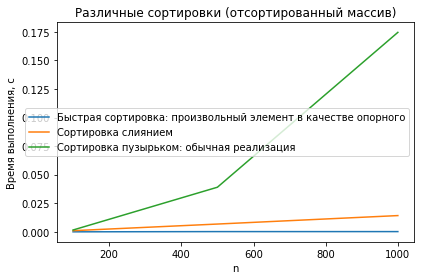

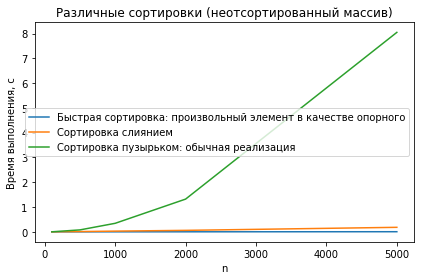

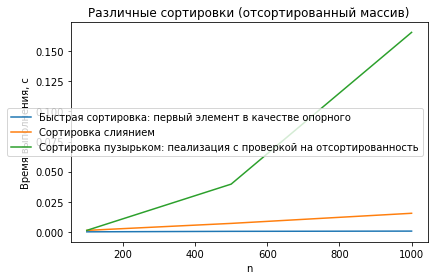

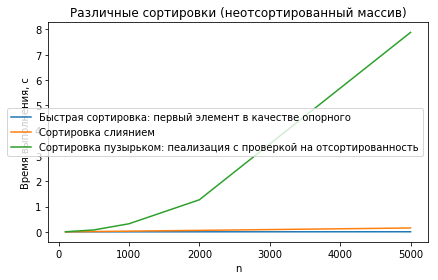

In [348]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [19]:
def search(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i

Проверьте корректность реализации:

In [ ]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [6]:
def binary_search(a, x):
    minimum = 0
    maximum = len(a)
    while minimum != maximum:
        middle = (maximum + minimum)//2
        if a[middle] == x:
            return middle
        elif a[middle]>x:
            maximum = middle
        else:
            minimum = middle
    else:
        return None 

Проверьте корректность реализации:

In [7]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [13]:
def interpolation_search(a, x):
    low = 0
    high = len(a) - 1

    while (a[low] < x and a[high] > x):
        mid = low + ((x - a[low]) * (high - low)) / (a[high] - a[low])
        mid = int(mid)

        if (a[mid] < x):
            low = mid + 1
        elif (a[mid] > x):
            high = mid - 1
        else:
            return mid

    if (a[low] == x):
        return low
    elif (a[high] == x):
        return high
    else:
        return -1

Проверьте свою реализацию:

In [15]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

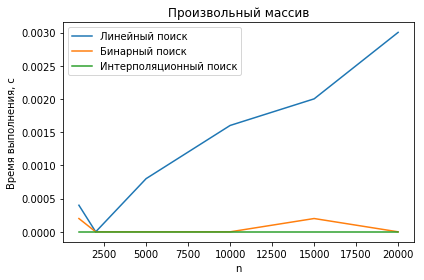

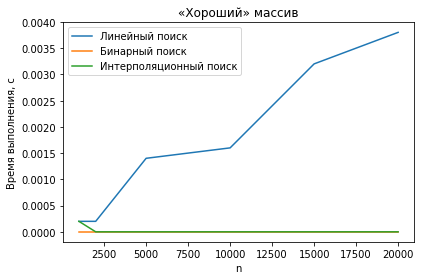

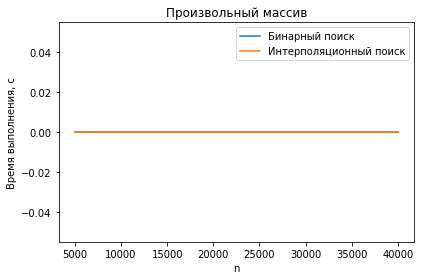

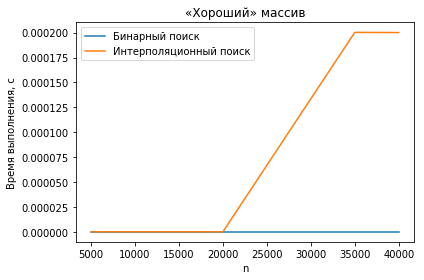

In [20]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.

In [5]:
import random


def merge(a, b):
    result = []
    i ,j = 0, 0
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            result.append(a[i])
            i += 1
        else:
            result.append(b[j])
            j += 1
    result += a[i:]
    result += b[j:]
    return result

def merge_sort(alist):
    if len(alist) < 2:
        return alist
    middle = len(alist) // 3
    left = merge_sort(alist[:middle])
    center = merge_sort(alist[middle:middle*2])
    right = merge_sort(alist[middle*2:])
    return merge(merge(left, center),right)


a = [random.randint(0,99) for i in range(9)]

print(merge_sort(a))

[11, 21, 30, 37, 38, 49, 63, 74, 88]
